In [64]:
import os 
import nltk

from nltk.corpus.reader.plaintext import PlaintextCorpusReader

path = "./"
os.chdir(path)
dict_text = {}
dict_token = {}

for file in os.listdir()[:3]:
    if file.endswith(".txt"):
        file_path = f"{path}\{file}"
        data = open(file_path, 'r', encoding="utf-8-sig")
        tokenize = data.read()
        dict_text[file] = data.read()

        # Extraire des tokens convert en une list de token
        token_list = nltk.word_tokenize(tokenize)
        print("Token list : ", token_list[:20])
        print("Total tokens : ", len(token_list), "\n")
        dict_token[file] = token_list

Token list :  ['The', 'Project', 'Gutenberg', 'EBook', 'of', 'Alice', 'in', 'Wonderland', ',', 'by', 'Alice', 'Gerstenberg', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone']
Total tokens :  22195 

Token list :  ['Project', 'Gutenberg', "'s", 'Among', 'the', 'Forest', 'People', ',', 'by', 'Clara', 'Dillingham', 'Pierson', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone']
Total tokens :  40447 

Token list :  ['The', 'Project', 'Gutenberg', 'EBook', 'of', 'An', 'Introductory', 'Course', 'of', 'Quantitative', 'Chemical', 'Analysis', ',', 'by', 'Henry', 'P.', 'Talbot', 'This', 'eBook', 'is']
Total tokens :  83154 



In [139]:
from nltk.corpus import stopwords

for keys, values in dict_token.items():
    corpus = PlaintextCorpusReader(os.getcwd(), keys)
    # # Extraire id de fichier du corpus
    # print("Fichier dans le corpus :", corpus.fileids())

    # # print("Données lues à partir des fichier : ", corpus.raw()[:70])

    # # Extraire paragraphes du corpus
    # paragraphs = corpus.paras()
    # print("Nombre total de paragraphs corpus :", len(paragraphs))

    # # Extraire phrases du corpus
    # sentences = corpus.sents()
    # print("Nombre total de phrases dans ce corpus : ", len(sentences))
    # print("Première phrase : ", sentences[0])

    # # Trouver la distribution de fréquence des mots dans le corpus
    # course_freq_dist = nltk.FreqDist(corpus.words())

    # # Mots les plus utilisés et leur nb de fois qu'ils apparaissent 
    # print("Top 10 des mots du corpus : ", course_freq_dist.most_common(10), "\n")

    # Utilisation package punkt pour extraire les tokens

    token_list2 = list(filter(lambda token: nltk.tokenize.punkt.PunktToken(token).is_non_punct, values))
    print(corpus.fileids())
    print("Liste des tokens après supp ponctuation : ", token_list2[:20])
    print("Total des tokens aprè supp ponctuation : ", len(token_list2))

    token_list3 =[word.lower() for word in token_list2]
    print("List tokens après conversion en lower : ", token_list3[:20])

    token_list4 = list(filter(lambda token : token not in stopwords.words('english'), token_list3))
    print("List tokens après supp mots vides : ", token_list4[:20])
    print("Total tokens après supp mots vides : ", len(token_list4), "\n")
    

['alice-in-wonderland.txt']
Liste des tokens après supp ponctuation :  ['The', 'Project', 'Gutenberg', 'EBook', 'of', 'Alice', 'in', 'Wonderland', 'by', 'Alice', 'Gerstenberg', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere']
Total des tokens aprè supp ponctuation :  18654
List tokens après conversion en lower :  ['the', 'project', 'gutenberg', 'ebook', 'of', 'alice', 'in', 'wonderland', 'by', 'alice', 'gerstenberg', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere']
List tokens après supp mots vides :  ['project', 'gutenberg', 'ebook', 'alice', 'wonderland', 'alice', 'gerstenberg', 'ebook', 'use', 'anyone', 'anywhere', 'cost', 'almost', 'restrictions', 'whatsoever', 'may', 'copy', 'give', 'away', 're-use']
Total tokens après supp mots vides :  10121 

['Among the Forest People.txt']
Liste des tokens après supp ponctuation :  ['Project', 'Gutenberg', "'s", 'Among', 'the', 'Forest', 'People', 'by', 'Clara', 'Dillingham', 'Pierson', 'This', 'eB

In [69]:
dict_token['An Introductory Course of Quantitative Chemical Analysis.txt'][:10]

['The',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'An',
 'Introductory',
 'Course',
 'of',
 'Quantitative']

Tokenisation de texte (processus décomposit° en mots, termes, symboles, etc.)

In [74]:
# Utilisation package punkt pour extraire les tokens
dict_punkt = {}
for keys, values in dict_token.items():
    token_list2 = list(filter(lambda token: nltk.tokenize.punkt.PunktToken(token).is_non_punct, values)) 
    print("Liste des tokens après supp ponctuation : ", token_list2[:20])
    print("Total des tokens aprè supp ponctuation : ", len(token_list2), "\n")
    dict_punkt[keys] = token_list2

Liste des tokens après supp ponctuation :  ['The', 'Project', 'Gutenberg', 'EBook', 'of', 'Alice', 'in', 'Wonderland', 'by', 'Alice', 'Gerstenberg', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere']
Total des tokens aprè supp ponctuation :  18654 

Liste des tokens après supp ponctuation :  ['Project', 'Gutenberg', "'s", 'Among', 'the', 'Forest', 'People', 'by', 'Clara', 'Dillingham', 'Pierson', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere']
Total des tokens aprè supp ponctuation :  34662 

Liste des tokens après supp ponctuation :  ['The', 'Project', 'Gutenberg', 'EBook', 'of', 'An', 'Introductory', 'Course', 'of', 'Quantitative', 'Chemical', 'Analysis', 'by', 'Henry', 'P.', 'Talbot', 'This', 'eBook', 'is', 'for']
Total des tokens aprè supp ponctuation :  68419 



Comparaison nb total de token dans txt: Avant nettoyage poncutation VS Après nettoyage 

Fichier 1 -> Total tokens :  **22195** | **18654**

Fichier 2 -> Total tokens :  **40447** | **34662** 

Fichier 3 -> Total tokens :  **83154** | **68419**

In [76]:
dict_punkt['An Introductory Course of Quantitative Chemical Analysis.txt'][:10]

['The',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'An',
 'Introductory',
 'Course',
 'of',
 'Quantitative']

Convertir token en minuscule les tokens

In [77]:
# Conversion en minuscule
for keys, values in dict_punkt.items():
    token_list3 =[word.lower() for word in values]
    print("List tokens après conversion en lower : ", token_list3[:20], "\n")
    dict_punkt[keys] = token_list3

List tokens après conversion en lower :  ['the', 'project', 'gutenberg', 'ebook', 'of', 'alice', 'in', 'wonderland', 'by', 'alice', 'gerstenberg', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere'] 

List tokens après conversion en lower :  ['project', 'gutenberg', "'s", 'among', 'the', 'forest', 'people', 'by', 'clara', 'dillingham', 'pierson', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere'] 

List tokens après conversion en lower :  ['the', 'project', 'gutenberg', 'ebook', 'of', 'an', 'introductory', 'course', 'of', 'quantitative', 'chemical', 'analysis', 'by', 'henry', 'p.', 'talbot', 'this', 'ebook', 'is', 'for'] 



In [78]:
dict_punkt['An Introductory Course of Quantitative Chemical Analysis.txt'][:10]

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'an',
 'introductory',
 'course',
 'of',
 'quantitative']

In [79]:
# nltk.download('stopwords')
from nltk.corpus import stopwords

# Remove stopwords
for keys, values in dict_punkt.items():
    token_list4 = list(filter(lambda token : token not in stopwords.words('english'), values))
    print("List tokens après supp mots vides : ", token_list4[:20])
    print("\nTotal tokens après supp mots vides : ", len(token_list4))
    dict_punkt[keys] = token_list4

    print("Top 10 des mots du corpus : ", token_list4.most_common(10))

List tokens après supp mots vides :  ['project', 'gutenberg', 'ebook', 'alice', 'wonderland', 'alice', 'gerstenberg', 'ebook', 'use', 'anyone', 'anywhere', 'cost', 'almost', 'restrictions', 'whatsoever', 'may', 'copy', 'give', 'away', 're-use']

Total tokens après supp mots vides :  10121
List tokens après supp mots vides :  ['project', 'gutenberg', "'s", 'among', 'forest', 'people', 'clara', 'dillingham', 'pierson', 'ebook', 'use', 'anyone', 'anywhere', 'cost', 'almost', 'restrictions', 'whatsoever', 'may', 'copy', 'give']

Total tokens après supp mots vides :  16022
List tokens après supp mots vides :  ['project', 'gutenberg', 'ebook', 'introductory', 'course', 'quantitative', 'chemical', 'analysis', 'henry', 'p.', 'talbot', 'ebook', 'use', 'anyone', 'anywhere', 'cost', 'almost', 'restrictions', 'whatsoever', 'may']

Total tokens après supp mots vides :  38922


Comparaison nb total de token dans txt: Avant nettoyage mots vides VS Après nettoyage 

Fichier 1 -> Total tokens :  **18654** | **10121**

Fichier 2 -> Total tokens :  **34662** | **16022** 

Fichier 3 -> Total tokens :  **68419** | **38922**

In [120]:
dict_punkt['An Introductory Course of Quantitative Chemical Analysis.txt'][:10]

['project',
 'gutenberg',
 'ebook',
 'introductory',
 'course',
 'quantitative',
 'chemical',
 'analysis',
 'henry',
 'p.']

alice-in-wonderland.txt


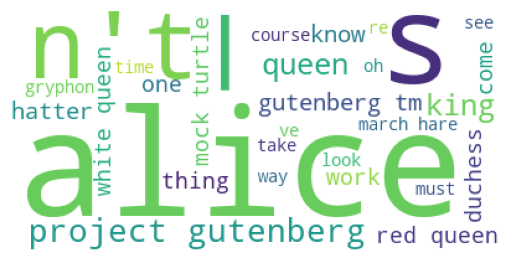

Among the Forest People.txt


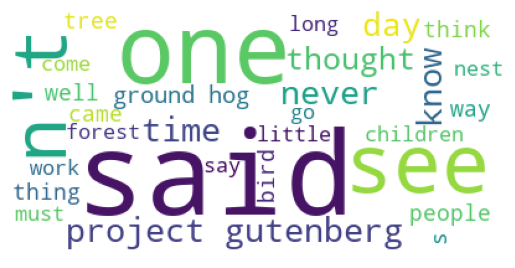

An Introductory Course of Quantitative Chemical Analysis.txt


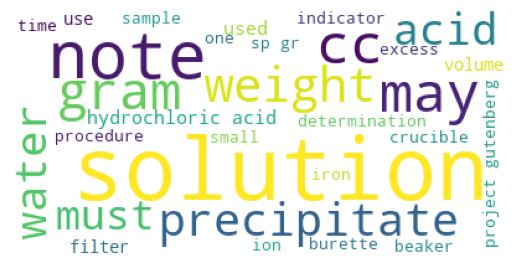

In [151]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
for books in dict_punkt.keys() : 

  print(books)
  unique_string=(" ").join(dict_punkt[books])
  stopwords.update("n't")
  wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', max_words = 30).generate(unique_string)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()

In [140]:
# for keys in dict_punkt:
#     # Trouver la distribution de fréquence des mots dans le corpus
#     course_freq_dist = nltk.FreqDist(corpus.words())

#     # Mots les plus utilisés et leur nb de fois qu'ils apparaissent 
#     print("Top 10 des mots du corpus : ", course_freq_dist.most_common(10))